# Vectorisation Bag of Words (BoW) avec CountVectorizer et classification avec MultinomialNB

In [1]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,zrkrwmgseetfegaozv kovx vh,0,0,0,1
1,Comment puis-je me rendre de l'aéroport de CHA...,1,0,0,0
2,4f3;S0`HsL# hL8ydlwlM2cK7=,0,0,0,1
3,"u*]P\UsbAr,CoDnDdr*-GKN(0O",0,0,0,1
4,J'aimerais connaître le chemin pour aller de S...,1,0,0,0
...,...,...,...,...,...
1302960,Il a prétendu être mon ami.,0,0,1,0
1302961,I am planning a trip from saint paul les dax t...,0,1,0,0
1302962,Go from the train station of Loches to Venarey...,0,1,0,0
1302963,Je souhaiterais aller à verneuil sur serre dep...,1,0,0,0


In [2]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


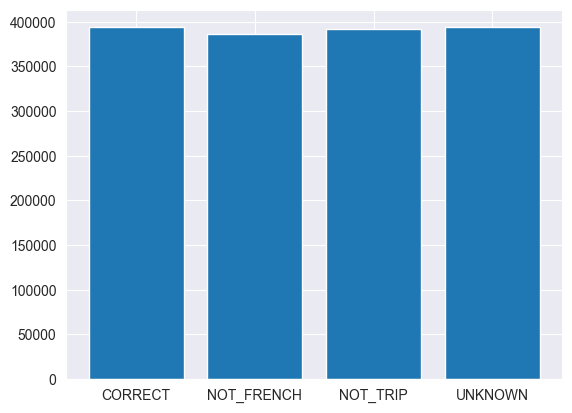

In [3]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Split du dataset en train, test et validation

In [4]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)
X_train = dataset['text']
y_train = dataset[labels]

# To check how vectorizer works without UNKNOWN words being isolated
X_train_without_unknown = dataset[dataset['UNKNOWN'] == 0]['text']
y_train_without_unknown = dataset[dataset['UNKNOWN'] == 0][labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(521185,) (65148,) (65149,)
(521185, 4) (65148, 4) (65149, 4)


In [5]:
X_train.values

array(['Find a way to leave Saint-Claude.',
       "Je cherche un moyen de partir de l'aéroport de abbeville.",
       'Io non posso fare niente per fermare quello che sta succedendo.',
       ..., ';g(W@B8h,?jix#1,Htn)G>*g9J',
       'Il y a-t-il des trains de marmande à issoudun jardin ?',
       'pv mmzmvqh b f g nazf yqag'], dtype=object)

# Exemple d'utilisation de CountVectorizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<521185x407707 sparse matrix of type '<class 'numpy.int64'>'
	with 4277613 stored elements in Compressed Sparse Row format>

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

In [7]:
v.get_feature_names_out()[100000:100050]

array(['efa73mlu', 'efa7ebi', 'efac', 'efacxgghis', 'efagli', 'efahge',
       'efahyx_', 'efakwrwibl', 'efalleix', 'efaq', 'efauecem',
       'efaxjcuvmswoyevm', 'efazn', 'efb', 'efb8sl', 'efbay', 'efbfbr2',
       'efbfpbnkuvjbaa', 'efbg', 'efbhe4kak', 'efbhn8whxqt0', 'efbjzogx',
       'efbny', 'efbo', 'efbrvmqgdovyspvfulpqraoad', 'efbrw', 'efbw',
       'efbws', 'efbygnf', 'efbz', 'efc', 'efc64', 'efcetnecq',
       'efcferimihe', 'efcg', 'efcj', 'efcl', 'efcndjzxgboickec', 'efcr',
       'efcs', 'efcshh', 'efcua2x', 'efd', 'efdb', 'efdbz', 'efdc',
       'efdcycjqo', 'efdcztoxgvwfwd', 'efde0', 'efdezvsfcr'], dtype=object)

In [8]:
# Number of identified features
v.get_feature_names_out().shape

(407707,)

In [9]:
v = CountVectorizer()

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<454735x80811 sparse matrix of type '<class 'numpy.int64'>'
	with 4594541 stored elements in Compressed Sparse Row format>

In [10]:
# Number of identified features
v.get_feature_names_out().shape

(80811,)

In [11]:
v.get_feature_names_out()[30000:30050]

array(['gena', 'genannt', 'genau', 'genauen', 'genauer', 'genauso',
       'gendarm', 'gendarmerie', 'gendarmes', 'gendefekt', 'gender',
       'genderless', 'gendre', 'gene', 'genealogical', 'genehmigung',
       'geneigt', 'genek', 'genera', 'generaciones', 'generación',
       'general', 'generale', 'generales', 'generalise', 'generally',
       'generalmente', 'generalstreik', 'generare', 'generated',
       'generates', 'generation', 'generations', 'generator',
       'generazione', 'generazioni', 'genere', 'genereuse', 'genereux',
       'generi', 'generici', 'generosa', 'generosi', 'generosidad',
       'generosity', 'generoso', 'generous', 'genervt', 'genes', 'genesa'],
      dtype=object)

In [12]:
# Add threshold to observe only words that appear at least 100 times
v = CountVectorizer(min_df=100)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<454735x1895 sparse matrix of type '<class 'numpy.int64'>'
	with 4304990 stored elements in Compressed Sparse Row format>

In [13]:
# Number of identified features
v.get_feature_names_out().shape

(1895,)

In [14]:
v.get_feature_names_out()[::50]

array(['11', 'alone', 'arrivez', 'baden', 'bidos', 'budange', 'cela',
       'chiers', 'cosa', 'denis', 'dorat', 'ensuès', 'feel', 'gare',
       'guth', 'hombourg', 'jallieu', 'lannion', 'll', 'lèze', 'maurice',
       'molsheim', 'moûtiers', 'nevers', 'omer', 'pauillac', 'polignan',
       'qualcuno', 'ribeauville', 'sagen', 'selestat', 'sq', 'temps',
       'ton', 'una', 'vertaizon', 'wants', 'wouldn'], dtype=object)

# Utilisation d'un pipeline SKLearn (vectorizer + classifier MultinomialNB avec OneVsRestClassifier pour la classification multi-label)

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', OneVsRestClassifier(MultinomialNB()))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', OneVsRestClassifier(estimator=MultinomialNB()))])

# Evaluation du modèle, métriques

In [16]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     CORRECT       0.89      1.00      0.94     19607
  NOT_FRENCH       0.98      1.00      0.99     19329
    NOT_TRIP       0.95      0.89      0.92     19675
     UNKNOWN       1.00      0.81      0.90     19668

   micro avg       0.95      0.92      0.94     78279
   macro avg       0.96      0.92      0.94     78279
weighted avg       0.96      0.92      0.94     78279
 samples avg       0.90      0.91      0.90     78279


C:\Developpement\environments\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

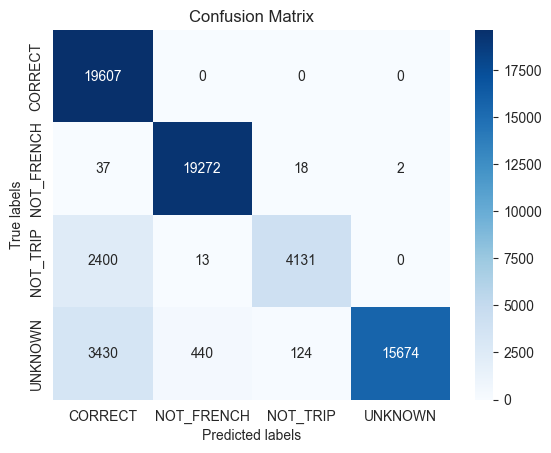

In [18]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

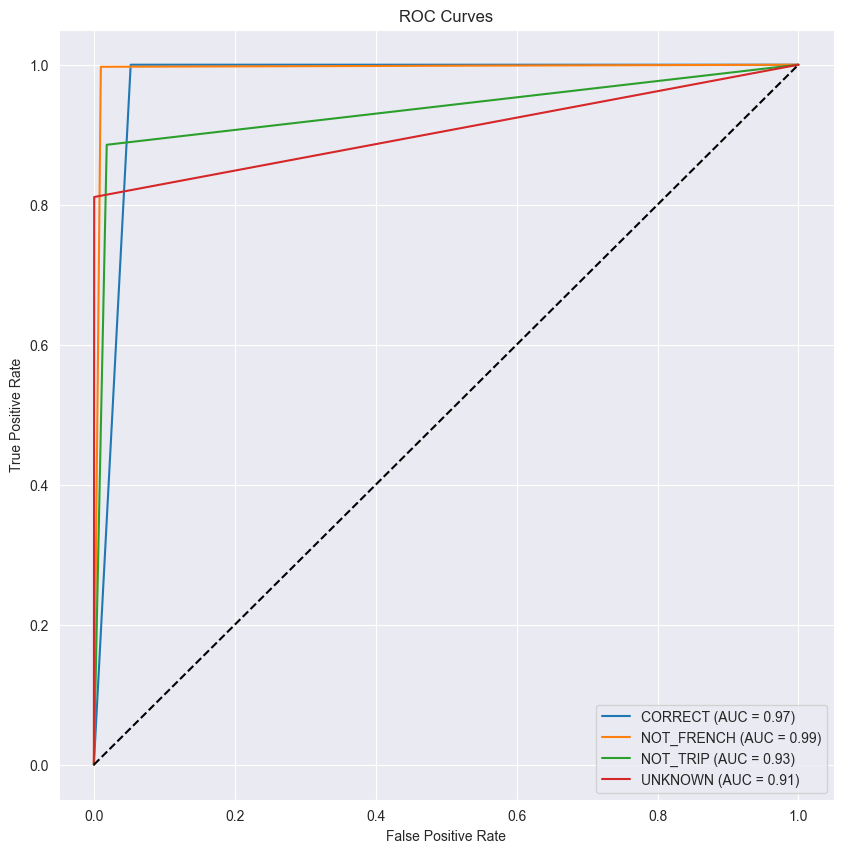

In [19]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [20]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 0.5%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 92.8%
 - UNKNOWN => 0.0%

* Je veux aller du cinéma au restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 100.0%
 - UNKNOWN => 0.0%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 99.8%
 - UNKNOWN => 0.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 4.6%
 - UNKNOWN => 0.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 100.0%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 100.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 0.0%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 99.9%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.9%
 - UNKNOWN => 0.0%

* Nantes à Toulouse
 - CORRECT => 66.0%
 - NOT_FRENCH => 16.2%
 - NOT_TRIP => 6.8%
 - UNKNOWN => 0.0%

* Dirige moi vers Lyon depuis Saint-Étien